# Metoda klasyfikacji z SVM z różnymi kernelami by BC (C) 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

/home/cerber/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
# Istnieją automatyczne repozytoria, z których można załadować dane
#iris = datasets.load_iris() 
#iris.keys()

#dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris_path = 'Iris.csv'
# Załaduj dane Iris z pliku do pandas data frame
iris_df = pd.read_csv(os.path.join(os.getcwd(), iris_path))
# print( iris_df )
# print( iris_df.head() )

Text(0.5, 1.0, 'Petal dims')

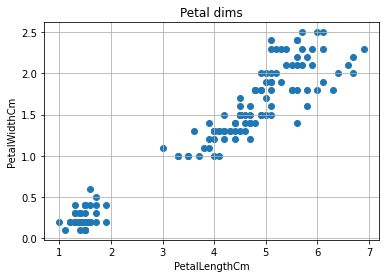

In [7]:
plt.scatter(  x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris_df )
plt.xlabel( 'PetalLengthCm' )
plt.ylabel( 'PetalWidthCm' )
plt.grid()
plt.title( 'Petal dims' )

In [11]:
# Przygotujmy dane do trenowania i testowania klasyfikatora
# Kolumny w pandasie możemy wybrać na kilka sposobów:
# - podając listę z nazwami kolumn, przykład: iris_df[ [ 'SepalLengthCm' ] ]
# - wołając metodę loc[], iris_df.loc[ :, [ 'SepalLengthCm' ] ]
# - wołając metodę iloc[], której podajemy nie nazwy, ale indeksy
X = iris_df.iloc[ :, 1 : 5 ]              
# print( X )

y = iris_df.loc[ :, [ 'Species' ] ]  
# print( y )

In [13]:
# Ale my wolimy etykiety numeryczne, więc zamieńmy teksty na wartości 0, 1, 2
y_num = np.zeros( len( y ) )
y_num[ np.where( y[ 'Species' ] == 'Iris-versicolor' ) ]    = 1
y_num[ np.where( y[ 'Species' ] == 'Iris-virginica' ) ]     = 2

In [14]:
ilość_danych = len( X )
indeksy_danych = list( range( ilość_danych ) )
np.random.shuffle( indeksy_danych )
data_split_ratio = 0.7
indeks_graniczny = int( ilość_danych * data_split_ratio )

X_train = X.iloc[ indeksy_danych[  0 : indeks_graniczny ], : ]
y_train = [ y_num[ i ] for i in indeksy_danych[  0 : indeks_graniczny ] ]

X_test = X.iloc[ indeksy_danych[ indeks_graniczny : ilość_danych ], : ]
y_test = [ y_num[ i ] for i in indeksy_danych[ indeks_graniczny : ilość_danych ] ]

In [15]:
ilość_danych = len( X )
indeksy_danych = list( range( ilość_danych ) )
np.random.shuffle( indeksy_danych )
data_split_ratio = 0.7
indeks_graniczny = int( ilość_danych * data_split_ratio )

X_train = X.iloc[ indeksy_danych[  0 : indeks_graniczny ], : ]
y_train = [ y_num[ i ] for i in indeksy_danych[  0 : indeks_graniczny ] ]

X_test = X.iloc[ indeksy_danych[ indeks_graniczny : ilość_danych ], : ]
y_test = [ y_num[ i ] for i in indeksy_danych[ indeks_graniczny : ilość_danych ] ]

In [16]:
kernels = [ 'linear', 'rbf', 'poly' ]

for k in kernels:

    svm_model = SVC( kernel = k )
    svm_model.fit( X_train, y_train )
    svm_pred = svm_model.predict( X_test )
    print( "Accuracy z kernelem {}".format( k ), accuracy_score( svm_pred, y_test ) )

Accuracy z kernelem linear 1.0
Accuracy z kernelem rbf 1.0
Accuracy z kernelem poly 1.0


In [18]:
def make_meshgrid( x, y, h=.02 ):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid( np.arange(x_min, x_max, h), np.arange(y_min, y_max, h) )
    return xx, yy

def plot_contours( ax, clf, xx, yy, ** params ):
    Z = clf.predict( np.c_[ xx.ravel(), yy.ravel() ] )
    Z = Z.reshape( xx.shape )
    out = ax.contourf( xx, yy, Z, ** params )
    return out


# Skróćmy dane do 2-wymiarów

X_train = X_train.iloc[ :, [ 0, 1 ] ]
X_test  = X_test.iloc[ :, [ 0, 1 ] ]

/home/cerber/ai/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy z kernelem linear 0.8444444444444444


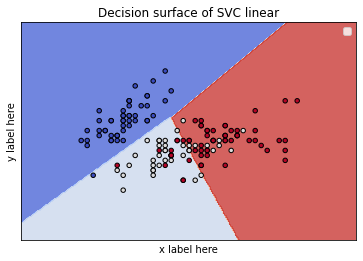

Accuracy z kernelem rbf 0.8444444444444444


/home/cerber/ai/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


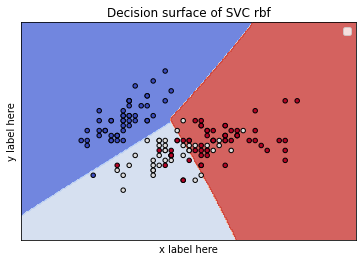

/home/cerber/ai/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy z kernelem poly 0.8444444444444444


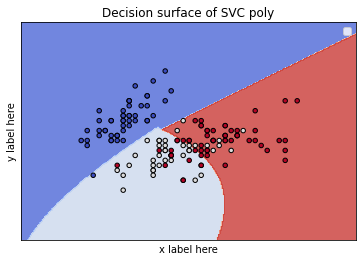

In [20]:
for k in kernels:

    svm_model = SVC( kernel = k )
    svm_model.fit( X_train, y_train )
    svm_pred = svm_model.predict( X_test )
    print( "Accuracy z kernelem {}".format( k ), accuracy_score( svm_pred, y_test ) )

    fig, ax = plt.subplots()
    title = ( 'Decision surface of SVC ' + svm_model.kernel )
    # Set-up grid for plotting.
    X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, svm_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter( X0, X1, c = y_num, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('y label here')
    ax.set_xlabel('x label here')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()


In [8]:
# Przygotujmy partycje danych: treningowa oraz testową
#X_train, X_test, y_train, y_test = train_test_split( X, y_num, test_size = 0.33, random_state = 13 )

# Teraz wytrenujemy jeden z modeli SVM


# -------------
# DO ZROBIENIA:
# - zbadaj każdą linijkę i zrozum jak działa (użyj help do Pandas, scikit-learn itd)
# - dodaj dodatkową pętlę i wielokrotnie zrób train_test_split oraz SVM, dla różnych partycji (losowo)
# - zrób zadanie poniżej wykorzystując PCA
# - zbadaj SVM dla innych zbiorów danych, np. Wisconsing Breast Cancer, SIFT z obrazów itd. 

# Jak inaczej możemy postąpić? (podpowiedź: zastosujmy PCA i weźmy pierwsze 2 dominujące komponenty)
